# Project 3
# DS 501 - Introduction to Data Science
# Group 3&5

___

# Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on Movie Reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

## Part 1; Problem 1: Downloading Data
Modify the solution on Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

### Download Data Script

In [3]:
"""Script to download the movie review dataset"""

from pathlib import Path
from hashlib import sha256
import tarfile
from urllib.request import urlopen


URL = "http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz"

ARCHIVE_SHA256 = "fc0dccc2671af5db3c5d8f81f77a1ebfec953ecdd422334062df61ede36b2179"
ARCHIVE_NAME = Path(URL.rsplit("/", 1)[1])
DATA_FOLDER = Path("txt_sentoken")


if not DATA_FOLDER.exists():

    if not ARCHIVE_NAME.exists():
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, "wb") as archive:
            archive.write(opener.read())

    try:
        print("Checking the integrity of the archive")
        assert sha256(ARCHIVE_NAME.read_bytes()).hexdigest() == ARCHIVE_SHA256

        print("Decompressing %s" % ARCHIVE_NAME)
        with tarfile.open(ARCHIVE_NAME, "r:gz") as archive:
            archive.extractall(path=".")

    finally:
        ARCHIVE_NAME.unlink()

## Part 2; Problem 1: Sentiment Analysis

### Imports

In [4]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics


### Check number of samples and if prev script(s) ran properly

In [5]:

# the training data folder must be passed as first argument
movie_reviews_data_folder = DATA_FOLDER
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))



n_samples: 2000


### Sentiment Analysis

In [42]:

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=5000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search.cv_results_['params'][i],
             grid_search.cv_results_['mean_test_score'][i],
             grid_search.cv_results_['std_test_score'][i]))

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# import matplotlib.pyplot as plt
# plt.matshow(cm)
# plt.show()

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.86; std - 0.01
              precision    recall  f1-score   support

         neg       0.86      0.86      0.86       253
         pos       0.85      0.85      0.85       247

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

[[217  36]
 [ 36 211]]


___
# Problem 2 (20 points): Explore the Scikit-learn TfidfVectorizer Class

**Read the documentation for the TfidfVectorizer class at https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 


## Part 1; Problem 2:
 Define the term frequency–inverse document frequency (TF-IDF) statistic (https://en.wikipedia.org/wiki/Tf%E2%80%93idf) will likely help.

### Definition of TF-IDF

TF-IDF stands for "Term Frequency-Inverse Document Frequency." It is a way of figuring out how important a word is in a document or a piece of writing.

Let's say you have a book about cats. In this book, the word "cat" is used a lot because it's the main topic of the book. But the word "dog" is only used a few times because it's not really related to the subject of the book.

TF-IDF takes into account both the number of times a word appears in a document (the "Term Frequency") and how rare that word is in all the other documents (the "Inverse Document Frequency").

So, in the example of the book about cats, the word "cat" would have a high TF-IDF score because it appears frequently in the book and is relevant to the topic. The word "dog" would have a low TF-IDF score because it appears infrequently and is not as relevant to the topic.

Basically, TF-IDF helps us understand which words are most important in a document and which ones are less important.

## Part 2; Problem 2:
 Run the TfidfVectorizer class on the training data above (docs_train).


In [43]:
import pandas as pd

def run_vectorizer(min, max):
    vectorizer = TfidfVectorizer(min_df=min, max_df=max)


    vectors = vectorizer.fit_transform(docs_train)
    feature_names = vectorizer.get_feature_names_out()
    dense = vectors.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns=feature_names)

    print(f"Output Shape: {df.shape}")
    return df

df = run_vectorizer(0.2, 0.95)
df.head()

Output Shape: (1500, 251)


,about,acting,action,actor,actors,actually,after,again,all,almost,...,without,work,world,would,year,years,yet,you,young,your
0,0.000000,0.060443,0.116263,0.000000,0.000000,0.000000,0.042659,0.061442,0.031597,0.000000,...,0.000000,0.000000,0.0,0.08194,0.000000,0.000000,0.000000,0.067869,0.000000,0.059481
1,0.126175,0.000000,0.214203,0.000000,0.000000,0.053939,0.000000,0.113201,0.000000,0.000000,...,0.000000,0.048506,0.0,0.00000,0.000000,0.000000,0.000000,0.093781,0.056352,0.000000
2,0.157036,0.092399,0.000000,0.000000,0.093104,0.000000,0.065211,0.000000,0.096604,0.000000,...,0.000000,0.160988,0.0,0.00000,0.000000,0.000000,0.000000,0.051875,0.000000,0.090928
3,0.026241,0.000000,0.000000,0.051431,0.000000,0.000000,0.130764,0.000000,0.024214,0.000000,...,0.045296,0.080705,0.0,0.00000,0.043349,0.044641,0.048882,0.104022,0.000000,0.182332
4,0.078195,0.000000,0.000000,0.000000,0.139082,0.000000,0.000000,0.000000,0.000000,0.133713,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Part 3; Problem 2:
- Explore the min_df and max_df parameters of TfidfVectorizer.
- What do they mean? How do they change the features you get?


##### Book Definition

**min_df definition: min_dffloat or int, default=1**
    - When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float in range of [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**max_df definition: max_dffloat or int, default=1.0**
    - When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float in range [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

Explanation:

Min DF =0, Max DF=0.95

In [7]:
df = run_vectorizer(0, 0.95)
df.head()


Output Shape: (1500, 35341)


,00,000,0009f,007,00s,03,04,05,05425,10,...,zuko,zukovsky,zulu,zundel,zurg,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Min DF =0.5, Max DF=0.95

In [8]:
df = run_vectorizer(0.5, 0.95)
df.head()

Output Shape: (1500, 66)


,about,after,all,also,an,are,at,be,been,but,...,way,we,well,what,when,which,who,will,would,you
0,0.149481,0.000000,0.108316,0.061769,0.056161,0.156214,0.043913,0.127383,0.000000,0.172443,...,0.042212,0.059963,0.020433,0.170431,0.066714,0.071223,0.171103,0.000000,0.079471,0.245536
1,0.000000,0.068128,0.103896,0.069124,0.047136,0.238383,0.049141,0.285101,0.136879,0.267196,...,0.070858,0.000000,0.068597,0.057217,0.055993,0.000000,0.047869,0.000000,0.200100,0.274772
2,0.000000,0.102781,0.156744,0.000000,0.000000,0.000000,0.000000,0.071687,0.103252,0.134369,...,0.106900,0.000000,0.310466,0.086321,0.084474,0.000000,0.144435,0.000000,0.000000,0.165814
3,0.077186,0.000000,0.143820,0.000000,0.130498,0.131994,0.068025,0.263104,0.094739,0.246580,...,0.000000,0.000000,0.000000,0.079204,0.000000,0.082748,0.132527,0.094811,0.000000,0.076071
4,0.060163,0.000000,0.224202,0.000000,0.254292,0.051441,0.000000,0.102538,0.073844,0.192197,...,0.000000,0.144804,0.074014,0.185207,0.120829,0.000000,0.103298,0.000000,0.000000,0.059294


#### Answer:

As we can see from the above examples changes the min df and max df changes the result words.

If we increase the maximum this selects words that are more common throughout the document(s) such as: by, for it, on
These very high frequency words might not be that interesting to the topic of the document or sentiment.

If we decrease the minimum to 0 we see words such as yau, yatf, yearbook, zukovsky. These are very infrequent words that also might not be that interesting to the general sentiment of the document.


### Part 4; Problem 2
Explore the ngram_range parameter of TfidfVectorizer. What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

**ngram_rangetuple (min_n, max_n), default=(1, 1)**
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.

Min DF=0.9, Max DF=.99

In [9]:
df = run_vectorizer(0, 0.1)
df.head()

Output Shape: (1500, 34810)


,00,000,0009f,007,00s,03,04,05,05425,10,...,zuko,zukovsky,zulu,zundel,zurg,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Definition** ngram_rangetuple (min_n, max_n), default=(1, 1)
The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.

In [10]:
# Code Example


---
## Problem 3 (20 points): Machine Learning Algorithms

* Based upon Problem 2, pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [44]:
from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer(min_df=3, max_df=0.90)

pipeline1 = Pipeline([
    ('vect', vectorizer),
    ('clf', LinearSVC(C=15000)),
])

pipeline2 = Pipeline([
    ('vect', vectorizer),
    ('clf', KNeighborsClassifier(n_neighbors=3)),
])


parameters1 = {
    'vect__ngram_range': [(1, 1), (1, 3)],
    'vect__min_df': [3, 4, 5, 6],
    'vect__max_df': [0.7, 0.8, 0.9, 0.95]
}

parameters2 = {
    'vect__ngram_range': [(1, 1), (1, 3)],
    'clf__n_neighbors': [3, 12, 15, 20],
    'vect__min_df': [3, 4, 5, 6],
    'vect__max_df': [0.7, 0.8, 0.9, 0.95]
}

grid_search_linear = GridSearchCV(pipeline1, parameters1, n_jobs=-1)
grid_search_linear.fit(docs_train, y_train)

grid_search_knn = GridSearchCV(pipeline2,parameters2, n_jobs=-1)
grid_search_knn.fit(docs_train, y_train)



KeyboardInterrupt: 

In [51]:
# Performance

def calculate_performance_stats(grid_search):
    # TASK: print the mean and std for each candidate along with the parameter
    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
              % (grid_search.cv_results_['params'][i],
                 grid_search.cv_results_['mean_test_score'][i],
                 grid_search.cv_results_['std_test_score'][i]))

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    y_predicted = grid_search.predict(docs_test)

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)

print("Performance of Linear: \n")
calculate_performance_stats(grid_search_linear)

print("Performance of KNN: \n")
calculate_performance_stats(grid_search_knn)

Performance of Linear: 



AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

---
## Problem 4 (20 points): Open Ended Question:  Finding the Right Plot

* Can you find a two-dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(docs_train)
test_vectors = vectorizer.transform(docs_test)


In [87]:
import time
from sklearn import svm
from sklearn.metrics import classification_report



kernel = ['rbf', 'linear']

# Perform classification with SVM, kernel=linear
for k in kernel:
    print(f"Kernel {k}")
    classifier_linear = svm.SVC(kernel=k, C=0.85)
    classifier_linear.fit(train_vectors, y_train)
    prediction_linear = classifier_linear.predict(test_vectors)
    report = classification_report(y_test, prediction_linear, output_dict=True)
    print(report)


Kernel rbf
{'0': {'precision': 0.8682170542635659, 'recall': 0.8853754940711462, 'f1-score': 0.8767123287671234, 'support': 253}, '1': {'precision': 0.8801652892561983, 'recall': 0.8623481781376519, 'f1-score': 0.8711656441717791, 'support': 247}, 'accuracy': 0.874, 'macro avg': {'precision': 0.874191171759882, 'recall': 0.873861836104399, 'f1-score': 0.8739389864694512, 'support': 500}, 'weighted avg': {'precision': 0.8741194823499263, 'recall': 0.874, 'f1-score': 0.8739722665770232, 'support': 500}}
Kernel linear
{'0': {'precision': 0.8620689655172413, 'recall': 0.8893280632411067, 'f1-score': 0.8754863813229572, 'support': 253}, '1': {'precision': 0.8828451882845189, 'recall': 0.854251012145749, 'f1-score': 0.8683127572016461, 'support': 247}, 'accuracy': 0.872, 'macro avg': {'precision': 0.8724570769008801, 'recall': 0.8717895376934278, 'f1-score': 0.8718995692623017, 'support': 500}, 'weighted avg': {'precision': 0.8723324195642765, 'recall': 0.872, 'f1-score': 0.8719426110070295,

Text(0.5, 1.0, 'Bad Vs Good Words')

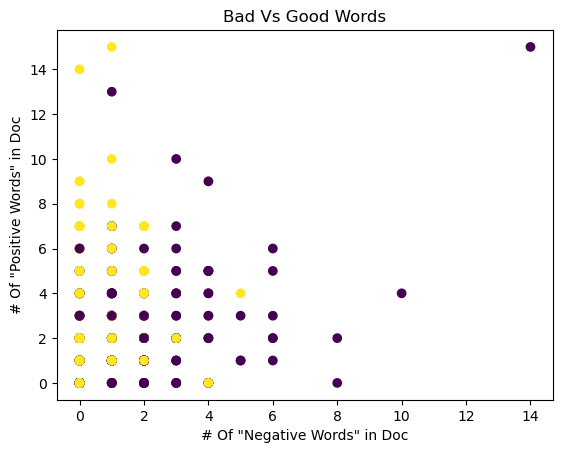

In [76]:
import matplotlib.pyplot as plt
import numpy as np

negative_words = ['bad',
                  'terrible',
                  'overdoes',
                  'confusing',
                  'failure',
                  'fail',
                  'lack',
                  'mundane',
                  'painfully',
                  'painful']
positive_words = ['good', 'great',
                  'worth',
                  'recommend',
                  'excellent',
                  'adequate',
                  'nice',
                  'positive',
                  'awesome']

count_negative = []
count_positive = []

for count, docs in enumerate(docs_test):

    number_of_negative = 0
    number_of_positive = 0

    for words in str(docs).split(' '):
        if words in positive_words:
            number_of_positive += 1
        if words in negative_words:
            number_of_negative += 1


    count_negative.append(number_of_negative)
    count_positive.append(number_of_positive)

x_test = np.column_stack((count_positive, count_negative))
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(x_test, y_test)

plt.scatter(count_negative, count_positive, c=y_test)
plt.xlabel('# Of "Negative Words" in Doc')
plt.ylabel('# Of "Positive Words" in Doc')
plt.title('Bad Vs Good Words')

In [37]:
print(y_train)

[0 0 1 ... 0 0 1]


In [23]:
word_counts_positive = {}
word_counts_negative = {}

for count, docs in enumerate(docs_test):
    if y_test[count]:
        for words in str(docs).split(' '):
            if words in word_counts_positive.keys():
                word_counts_positive[words] += 1
            else:
                word_counts_positive[words] = 1
    else:
        for words in str(docs).split(' '):
            if words in word_counts_negative.keys():
                word_counts_negative[words] += 1
            else:
                word_counts_negative[words] = 1


positive_sorted_freq = sorted(word_counts_positive.items(), key=lambda x:x[1])[::-1]
negative_sorted_freq = sorted(word_counts_negative.items(), key=lambda x:x[1])[::-1]
print(positive_sorted_freq)



[(',', 10940), ('the', 9500), ('.', 8601), ('a', 4938), ('and', 4840), ('of', 4735), ('to', 4204), ('is', 3564), ('in', 2743), ('"', 2345), ('that', 1909), (')', 1552), ('(', 1540), ('as', 1500), ('it', 1460), ('with', 1426), ('his', 1342), ('film', 1303), ('for', 1295), ('\\nthe', 1079), ('this', 988), ('but', 951), ('are', 920), ('he', 918), ('on', 874), ('by', 838), ('be', 785), ('who', 739), ('an', 730), ('not', 723), ('from', 713), ('i', 690), ('one', 684), ('was', 631), ('movie', 620), ('has', 616), ('at', 608), ('have', 581), ('you', 578), ('her', 565), ('all', 500), ('which', 481), ('they', 479), ('more', 464), ('about', 453), ('their', 441), ('out', 416), ('up', 415), ('like', 412), (':', 409), ('so', 406), ('or', 392), ('him', 364), ('some', 354), ('what', 352), ('than', 348), ('?', 343), ('most', 338), ('its', 337), ('just', 334), ('into', 329), ('time', 327), ('when', 323), ('will', 317), ('good', 305), ('also', 299), ('only', 289), ('been', 281), ('can', 280), ("it\\'s", 2

In [27]:
postive_words = [words[0] for words in positive_sorted_freq]
negative_words = [words[0] for words in negative_sorted_freq]
print(postive_words)

[',', 'the', '.', 'a', 'and', 'of', 'to', 'is', 'in', '"', 'that', ')', '(', 'as', 'it', 'with', 'his', 'film', 'for', '\\nthe', 'this', 'but', 'are', 'he', 'on', 'by', 'be', 'who', 'an', 'not', 'from', 'i', 'one', 'was', 'movie', 'has', 'at', 'have', 'you', 'her', 'all', 'which', 'they', 'more', 'about', 'their', 'out', 'up', 'like', ':', 'so', 'or', 'him', 'some', 'what', 'than', '?', 'most', 'its', 'just', 'into', 'time', 'when', 'will', 'good', 'also', 'only', 'been', 'can', "it\\'s", 'she', 'story', 'we', 'much', 'would', ';', 'even', 'very', 'character', 'them', 'other', '\\nit', 'first', '\\nbut', 'life', 'if', 'see', 'does', 'films', 'get', 'because', 'way', 'two', 'no', '\\ni', '\\nin', 'characters', '\\n', 'do', '\\nand', 'there', '-', 'make', 'well', 'never', 'really', '\\nthis', "\\n'", '\\nhe', 'best', 'people', 'too', 'great', 'new', 'over', 'man', 'little', 'any', 'how', 'had', 'world', 'many', 'were', 'where', 'being', 'me', 'these', 'such', 'could', 'off', 'scene', 'sc

In [35]:
postive_unique = []
negative_unique = []
threshold = 30
for count, words in enumerate(postive_words):
    if words not in negative_words[0:count+100]:
        postive_unique.append(words)
    if len(postive_unique) > threshold:
        break
for count, words in enumerate(negative_words):
    if words not in postive_words[0:count+100]:
        negative_unique.append(words)
    if len(negative_unique) > threshold:
        break

print(postive_unique)
print(negative_unique)


['world', 'star', 'year', 'fun', 'always', 'sense', 'family', 'feel', 'although', 'yet', 'gives', '\\nhis', 'especially', "it's", 'during', '\\none', 'job', 'american', '\\nwith', 'done', 'war', 'run', 'different', 'moments', 'true', 'group', 'friends', 'works', 'everything', '\\nwhile', 'able']
['bad', '*', '\\nthey', 'least', 'why', 'nothing', 'script', 'guy', 'interesting', 'trying', 'got', 'special', "can\\'t", '\\nso', 'worst', 'actor', 'reason', "there\\'s", '\\nfor', 'lost', 'else', 'anyone', "didn\\'t", 'thought', 'supposed', 'tries', 'doing', 'someone', 'problem', 's', 'stupid']


Text(0.5, 1.0, 'Bad Vs Good Words')

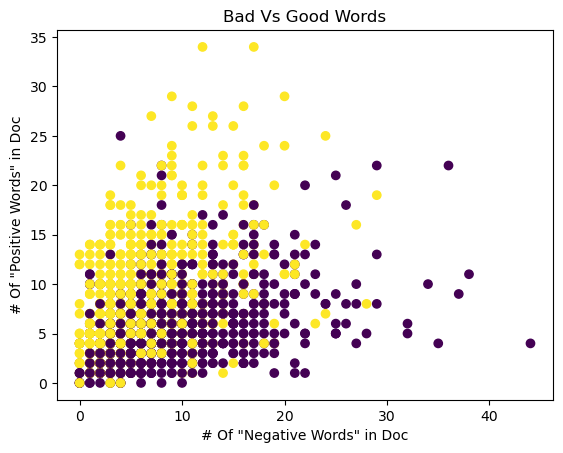

In [39]:
import matplotlib.pyplot as plt
import numpy as np

negative_words = negative_unique
positive_words = postive_unique

count_negative = []
count_positive = []

for count, docs in enumerate(docs_train):

    number_of_negative = 0
    number_of_positive = 0

    for words in str(docs).split(' '):
        if words in positive_words:
            number_of_positive += 1
        if words in negative_words:
            number_of_negative += 1


    count_negative.append(number_of_negative)
    count_positive.append(number_of_positive)

x_test = np.column_stack((count_positive, count_negative))


plt.scatter(count_negative, count_positive, c=y_train)
plt.xlabel('# Of "Negative Words" in Doc')
plt.ylabel('# Of "Positive Words" in Doc')
plt.title('Bad Vs Good Words')